# Q. 51-60

In [1]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt

## Q. 51. Morphological Gradient
OpenCVでのMorphological Processingはdilate, erodeのような専用の関数の他，morphologyEx関数で利用できる。

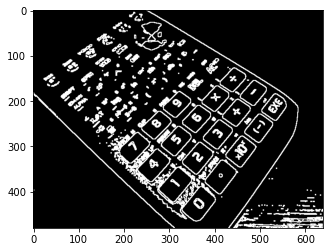

In [2]:
gimg = cv2.imread('Calc.jpg', cv2.IMREAD_GRAYSCALE)
ret, bimg = cv2.threshold(gimg, -1, 255, cv2.THRESH_OTSU)
SE = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
dst = cv2.morphologyEx(bimg, op = cv2.MORPH_GRADIENT, kernel = SE, iterations = 1)
plt.imshow(dst, cmap='gray')

## Q. 52. Tophat
White top-hatは原画像からオープニング処理後の画像の差分なので，SEより小さいものだけ残る感じ。あとは照明に勾配があるときも有効ではある。明るくて突出したものを削る感じか。

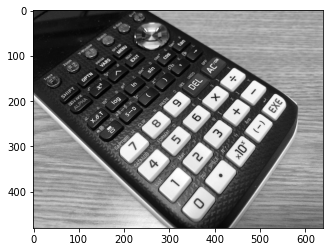

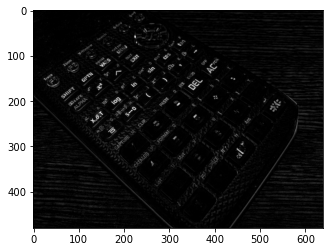

In [20]:
gimg = cv2.imread('Calc.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(gimg, cmap='gray')
SE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
dst = cv2.morphologyEx(gimg, op = cv2.MORPH_TOPHAT, kernel = SE, iterations = 3)
plt.figure()
plt.imshow(dst, cmap='gray')

## Q. 53. Blackhat
これもグレースケールにやる処理では。こっちはblack top-hatとも呼び，クロージングをした結果から原画像を引いた結果で，SEより小さいかより暗いところが目立つ感じか。

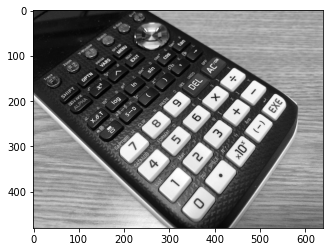

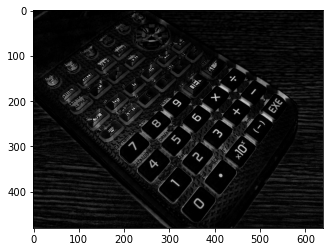

In [23]:
gimg = cv2.imread('Calc.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(gimg, cmap='gray')
SE = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
dst = cv2.morphologyEx(gimg, op = cv2.MORPH_BLACKHAT, kernel = SE, iterations = 2)
plt.figure()
plt.imshow(dst, cmap='gray')

## Q. 54. SSDでのテンプレートマッチング
SSDもSADも完璧に一致しないとあまり良くもないのでOpenCVにあるSSDだけ。かなり微妙な結果。

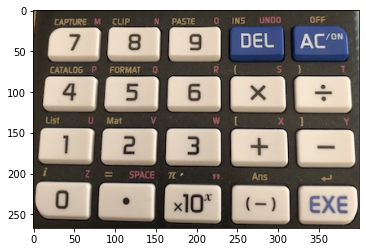

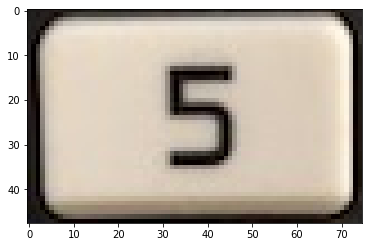

In [26]:
cimg = cv2.imread('Calc_s.jpg')
template = cv2.imread('CalcO5_s.jpg')
plt.imshow(cv2.cvtColor(cimg, cv2.COLOR_BGR2RGB))
plt.figure()
plt.imshow(cv2.cvtColor(template, cv2.COLOR_BGR2RGB))

SQDIFFについては明るいところが最も類似しているように1から類似度を引いている。ハズれ。

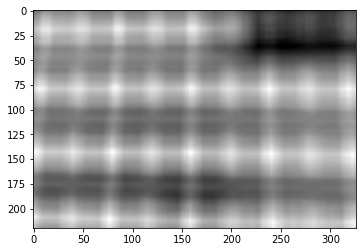

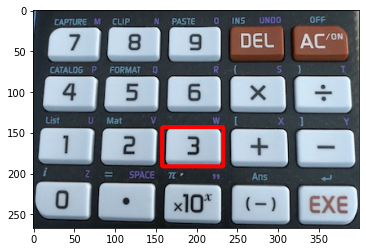

In [34]:
res = cv2.matchTemplate(cimg, template, cv2.TM_SQDIFF_NORMED)
plt.imshow(1-res, cmap='gray')
dst = cimg.copy()
minval, maxval, minloc, maxloc = cv2.minMaxLoc(1-res)
p2 = (maxloc[0]+template.shape[1], maxloc[1]+template.shape[0])
cv2.rectangle(dst,  maxloc, p2 , (255,0,0), 3)
plt.figure()
plt.imshow(dst, cmap='gray')

## Q. 56. NCCでのテンプレートマッチング
matchTemplateの引数と，resは普通に最大値がマッチした点なのが違うところ。でもハズれ。

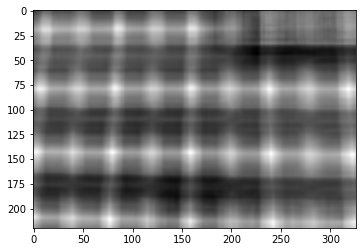

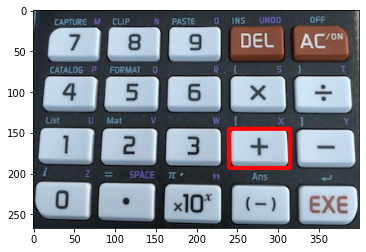

In [35]:
res = cv2.matchTemplate(cimg, template, cv2.TM_CCORR_NORMED)
plt.imshow(res, cmap='gray')
dst = cimg.copy()
minval, maxval, minloc, maxloc = cv2.minMaxLoc(res)
p2 = (maxloc[0]+template.shape[1], maxloc[1]+template.shape[0])
cv2.rectangle(dst,  maxloc, p2 , (255,0,0), 3)
plt.figure()
plt.imshow(dst, cmap='gray')

## Q. 57. ZNCCでのテンプレートマッチング
ZNCC は TM_CCOEFF_NORMED。matchTemplateの引数と，resは普通に最大値がマッチした点なのが違うところ。

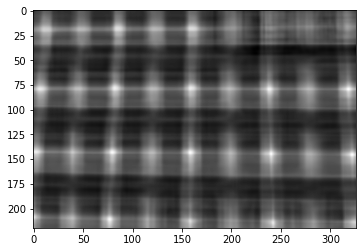

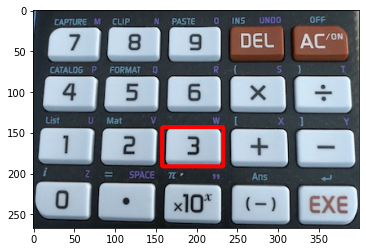

In [39]:
res = cv2.matchTemplate(cimg, template, cv2.TM_CCOEFF_NORMED)
plt.imshow(res, cmap='gray')
dst = cimg.copy()
minval, maxval, minloc, maxloc = cv2.minMaxLoc(res)
p2 = (maxloc[0]+template.shape[1], maxloc[1]+template.shape[0])
cv2.rectangle(dst,  maxloc, p2 , (255,0,0), 3)
plt.figure()
plt.imshow(dst, cmap='gray')

## Q. 58. ラベリング (4近傍)
OpenCVといえばラベリングが実装されていないので有名だったが，あるバージョンからconnectedComponentsで使えるようになった。そのためサイトによっては自前で実装する方法が書かれてたりする。
左上の円は8近傍で連結なので4近傍のラベリングをするとバラバラのblobになるため色付けすると別の色になる。

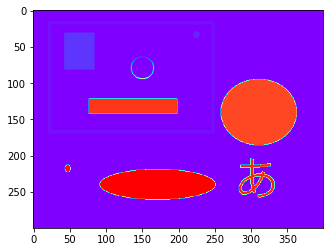

In [52]:
gimg = cv2.imread('blobs.png', cv2.IMREAD_GRAYSCALE)
ret, labels = cv2.connectedComponents(gimg, connectivity=4)
plt.imshow(labels, cmap='rainbow')

## Q. 59. ラベリング(8近傍)


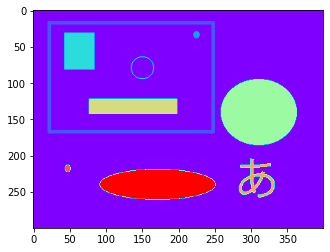

In [53]:
gimg = cv2.imread('blobs.png', cv2.IMREAD_GRAYSCALE)
ret, labels = cv2.connectedComponents(gimg, connectivity=8)
plt.imshow(labels, cmap='rainbow')

## Q. 60. アルファブレンディング
shapeさえ一緒なら，pythonだと係数掛けて足すだけ

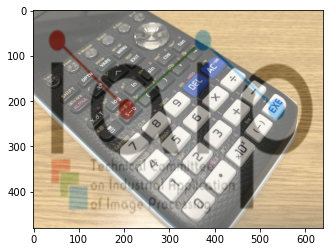

In [54]:
import numpy as np
cimg1 = cv2.imread('Calc.jpg')
cimg2 = cv2.imread('sample.png')
cimg2 = cv2.resize(cimg2, (cimg1.shape[1], cimg1.shape[0]))
dst = (cimg1*0.6).astype(np.uint8) + (cimg2*0.4).astype(np.uint8)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))